<a href="https://colab.research.google.com/github/shlomiye/Pytorch_Tutorial_Youtube/blob/main/Simple_NN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://datagy.io/pytorch-tutorial/

In [1]:
import torch

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10000, n_features=3, random_state=123)

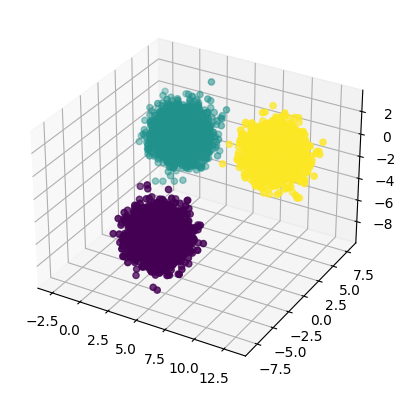

In [3]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

# Plotting the Data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)
plt.show()

In [4]:
type(X)

numpy.ndarray

In [5]:
type(y)

numpy.ndarray

In [6]:
# Creating a PyTorch Dataset
from torch.utils.data import Dataset

class BlobDataset(Dataset):
    def __init__(self, features, targets):
        super().__init__()
        self.features = torch.from_numpy(features).type(torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.targets[index]

In [7]:
# Creating Our Dataset
dataset = BlobDataset(X, y)
print(dataset)

In [8]:
# Printing the Length of the Dataset
print(len(dataset))

# Returns: 10000

10000


In [9]:
# Indexing Items in Our Dataset
print(dataset[0])

# Returns: (tensor([ 5.1478, -3.7830, -4.8408]), tensor(0))

(tensor([ 5.1478, -3.7830, -4.8408]), tensor(0))


In [10]:
# Splitting a Dataset into Training and Testing
from torch.utils.data import random_split
train, test = random_split(dataset=dataset, lengths=[0.8, 0.2])

In [11]:
# Creating DataLoaders
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=True)

In [12]:
# Printing the Batch Size of a DataLoader
print(train_loader.batch_size)

# Returns: 128

128


In [13]:
# Iterating over a DataLoader
data_iter = iter(train_loader)
first = next(data_iter)
print(first[0])

# Returns:
# [ 1.8840e+00,  3.0326e+00, -2.5314e+00],
# [-1.3279e-01,  3.9492e+00, -2.8709e+00],
# [ 3.2058e+00, -5.2252e+00, -5.4700e+00],
# [ 3.3243e+00, -4.1180e+00, -4.5077e+00],
# [ 9.6662e+00,  2.3717e+00, -1.2761e+00],
# ...

tensor([[-7.9062e-01,  2.8623e+00,  4.2307e-03],
        [ 9.6534e+00,  3.8221e+00, -1.6547e+00],
        [ 4.4936e+00, -3.1806e+00, -3.7781e+00],
        [ 1.0184e+01,  4.0389e+00,  2.1697e-01],
        [ 2.8575e+00, -3.1074e+00, -6.8141e+00],
        [ 9.2248e+00,  6.8395e+00, -1.8761e+00],
        [ 5.8941e-01,  3.6426e+00, -6.2167e-01],
        [ 3.0114e+00, -3.4475e+00, -5.2430e+00],
        [ 9.3033e+00,  3.8066e+00, -2.5657e-01],
        [ 4.5675e+00, -3.2538e+00, -7.3216e+00],
        [ 4.0190e+00, -5.0813e+00, -4.1934e+00],
        [ 2.9629e+00, -3.5793e+00, -6.7553e+00],
        [ 4.4037e+00, -4.7912e+00, -6.8801e+00],
        [ 4.2836e+00, -3.1261e+00, -4.6848e+00],
        [ 1.1330e+01,  4.1344e+00, -5.3422e-01],
        [ 1.8796e+00,  3.8939e+00,  3.6251e-01],
        [-8.4298e-01,  3.4256e+00, -1.7230e+00],
        [ 3.9714e+00, -4.0180e+00, -5.3775e+00],
        [ 6.5893e-02,  4.8131e+00, -3.0684e+00],
        [ 3.7194e+00, -5.3343e+00, -4.3019e+00],
        [ 1.2961e+00

In [14]:
# Accessing the Targets of the Batch
print(first[1])

# Returns:
# tensor([0, 2, 0, 0, 2...

tensor([1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 2, 2,
        0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 1,
        2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0,
        1, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0,
        1, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2,
        2, 1, 0, 2, 0, 0, 1, 0])


In [15]:
len(first[1])

128

In [16]:
# Building a PyTorch Neural Network
import torch.nn as nn

class BlobClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

In [17]:
# Instantiating Our Model
input_size = len(X[0])
hidden_size = 128
output_size = len(set(y))

model = BlobClassifier(input_size, hidden_size, output_size)
print(model)

# Returns:
# BlobClassifier(
#   (fc1): Linear(in_features=3, out_features=128, bias=True)
#   (fc2): Linear(in_features=128, out_features=3, bias=True)
#   (relu): ReLU()
# )

BlobClassifier(
  (fc1): Linear(in_features=3, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
  (relu): ReLU()
)


In [20]:
# Defining an Optimizer in PyTorch
import torch.optim as optim

learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
# Defining a PyTorch Criterion
criterion = nn.CrossEntropyLoss()

In [22]:
# Defining a Device in PyTorch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [23]:
# Creating our Training Function
def train(model, train_loader, criterion, optimizer, print_every, epoch, num_epochs):
    model.train()
    train_loss = 0.0

    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        train_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        if batch_idx % print_every == 0:
            print(f'Epoch [{epoch + 1:03}/{num_epochs:03}] Batch [{batch_idx+1:03}/{len(train_loader):03}], Train Loss: {train_loss/print_every:.4f}')

            train_loss = 0.0

In [27]:
# Defining a Validation Function
def validate(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(val_loader):
            inputs = inputs.to(device)
            targets = targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

            # Compute accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    avg_loss = val_loss / len(val_loader)
    accuracy = correct / total

    print(f'Validation Loss: {avg_loss:.4f}, Accuracy: {accuracy * 100:.2f}%')

In [28]:
# Creating a Training / Validation Loop
num_epochs = 50
model.to(device)
for epoch in range(num_epochs):
    train(model, train_loader, criterion, optimizer, 500, epoch, num_epochs)
    validate(model, test_loader, criterion, device)
    print('\n----------------------\n')

Epoch [001/050] Batch [001/063], Train Loss: 0.0000
Validation Loss: 0.0004, Accuracy: 100.00%

----------------------

Epoch [002/050] Batch [001/063], Train Loss: 0.0000
Validation Loss: 0.0003, Accuracy: 100.00%

----------------------

Epoch [003/050] Batch [001/063], Train Loss: 0.0000
Validation Loss: 0.0005, Accuracy: 99.95%

----------------------

Epoch [004/050] Batch [001/063], Train Loss: 0.0000
Validation Loss: 0.0004, Accuracy: 100.00%

----------------------

Epoch [005/050] Batch [001/063], Train Loss: 0.0000
Validation Loss: 0.0003, Accuracy: 100.00%

----------------------

Epoch [006/050] Batch [001/063], Train Loss: 0.0000
Validation Loss: 0.0005, Accuracy: 99.95%

----------------------

Epoch [007/050] Batch [001/063], Train Loss: 0.0000
Validation Loss: 0.0003, Accuracy: 100.00%

----------------------

Epoch [008/050] Batch [001/063], Train Loss: 0.0000
Validation Loss: 0.0004, Accuracy: 99.95%

----------------------

Epoch [009/050] Batch [001/063], Train Loss

In [29]:
 # Saving only the model's state dictionary
torch.save(model.state_dict(), 'file_path.p')

In [30]:
# Loading a Model and a state_dict
class BlobClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

input_size = len(X[0])
hidden_size = 128
output_size = len(set(y))

model = BlobClassifier(input_size, hidden_size, output_size)
state_dict = torch.load('file_path.p')
model.state_dict = state_dict

In [41]:
# Saving the entire model
# torch.save(model, 'model.p')

In [31]:
# Making predictions with PyTorch
data = torch.tensor([0.0, 0.0, -8.0], device=device)
with torch.inference_mode():
    preds = model(data)
    preds = torch.functional.F.softmax(preds, dim=0)
    max_idx = torch.argmax(preds)
    print(max_idx.item())

# Returns: 1

1
